In [1]:
%env THEANO_FLAGS="gcc__cxxflags=-march=corei7-avx"

env: THEANO_FLAGS="gcc__cxxflags=-march=corei7-avx"


In [2]:
import pandas as pd
import numpy as np

import theano.tensor as tt 
from theano import shared

import pymc3 as pm 
import arviz as az 

from sklearn import datasets
import statsmodels.api as sm 

from matplotlib import pyplot as plt 

import time

print(pm.__version__)

3.11.2


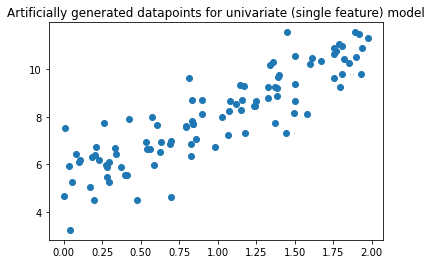

In [3]:
rng = np.random.RandomState(1)
x = 2 * rng.rand(100)
y = 3 * x + 5 + 1 * rng.randn(100)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.title("Artificially generated datapoints for univariate (single feature) model")
plt.scatter(x, y)
plt.show()

No handles with labels found to put in legend.


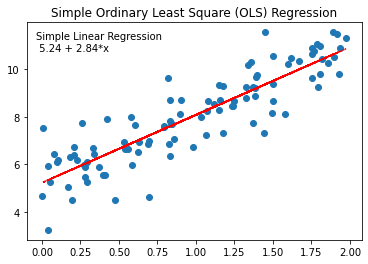

In [4]:
## Again: Linear model looks like: y = alpha + beta * x + epsilon
# Let's define it using statsmodels api

x_int = sm.add_constant(x)
ols_model = sm.OLS(y, x_int)
ols_fitted = ols_model.fit()

# Look at the model parameters and fit
# print(lm_fitted.summary())

# Predict and plot the predicitions
# (NOTE: prediction is done in-sample for the purpose of this exercise,
# so no train test spliit)
ypred = ols_fitted.predict(x_int)

plt.scatter(x, y)
plt.plot(x, ypred, color="red", ls=":")
legend_title = "Simple Linear Regression \n {} + {}*x".format(round(ols_fitted.params[0], 2), round(ols_fitted.params[1], 2))
legend = plt.legend(loc="upper left", frameon=False, title=legend_title)
plt.title("Simple Ordinary Least Square (OLS) Regression")
plt.show()

In [5]:
print("So, alpha is {}".format(round(ols_fitted.params[0], 2)))
print("and beta is {}".format(round(ols_fitted.params[1], 2)))

So, alpha is 5.24
and beta is 2.84


In [6]:
!python --version

Python 3.8.12


In [7]:
mape = np.mean(np.abs((y - ypred)/y)) * 100
print(f"MAPE for linear regression is {round(mape, 2)}%")

mean = np.mean(y)
print(mean)

MAPE for linear regression is 28.18%
7.999136874300952


In [8]:
with pm.Model() as model:
    
    # Priors
    alpha = pm.Normal("alpha", mu=0, sd=10)
    beta = pm.Normal("beta", mu=0, sd=10)
    sigma = pm.Normal("sigma", sd=1)
    
    # Deterministics
    mu = alpha + beta * x
    
    # Likelihood
    Ylikelihood = pm.Normal("Ylikelihood", mu=mu, sd=sigma, observed=y)

In [9]:
%%time
trace = pm.sample(draws=2000, model=model, chains=4, cores=1)

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha': array(0.), 'beta': array(0.), 'sigma': array(0.)}

Initial evaluation results:
alpha         -3.22
beta          -3.22
sigma         -0.92
Ylikelihood    -inf
Name: Log-probability of test_point, dtype: float64

In [10]:
pm.traceplot(trace)
pm.show()

NameError: name 'trace' is not defined